In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

employees_data = {
    'employeeId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
    'name': ['Alice', 'Miguel', 'Charlie', 'David', 'Sophia', 'Noah', 'Emma', 'Liam', 'Olivia', 'Jackson', 'Ava', 'Lucas', 'Isabella', 'Aiden', 'Mia', 'Ethan', 'Amelia', 'Mason', 'Harper', 'Caden', 'Evelyn', 'Oliver', 'Abigail', 'Elijah', 'Emily', 'Grayson', 'Charlotte', 'Jacob', 'Elizabeth', 'Michael', 'Avery', 'Benjamin', 'Sofia', 'Carter', 'Ella', 'James', 'Scarlett', 'Alexander', 'Grace', 'Sebastian', 'Lily', 'Jack', 'Aria', 'William', 'Chloe', 'Logan', 'Zoey', 'Jayden', 'Penelope', 'Wyatt', 'Riley', 'Luke', 'Layla', 'Henry', 'Madelyn', 'Owen', 'Ellie', 'Grayson', 'Aubrey', 'Gabriel', 'Aurora', 'Julian', 'Hannah', 'Levi', 'Mila', 'Isaiah', 'Addison', 'Lincoln', 'Sophie', 'Nathan', 'Stella', 'Adam', 'Alexa', 'Zachary', 'Peyton', 'Natalie', 'Eli', 'Lucy', 'Landon', 'Brooklyn', 'Hunter', 'Savannah', 'Christian', 'Zoe', 'Jonathan', 'Audrey', 'Aaron', 'Claire', 'Charles', 'Maya', 'Thomas', 'Anna', 'Connor', 'Lillian', 'Caleb', 'Skylar', 'Jeremiah', 'Leah', 'Josiah', 'Victoria'],
    'salary': [50325, 120000, 87000, 265000, 180000, 94000, 310000, 67000, 145000, 228000, 76000, 490000, 126000, 98000, 225000, 63000, 195000, 147000, 320000, 115000, 90000, 270000, 58000, 380000, 123000, 148000, 198000, 49000, 285000, 179000, 420000, 235000, 143000, 189000, 89000, 480000, 157000, 245000, 110000, 135000, 52000, 265000, 168000, 207000, 370000, 131000, 260000, 95000, 194000, 430000, 80000, 177000, 235000, 57000, 297000, 195000, 152000, 275000, 141000, 115000, 215000, 480000, 167000, 225000, 64000, 299000, 196000, 163000, 320000, 78000, 153000, 238000, 420000, 153000, 205000, 70000, 295000, 160000, 195000, 55000, 482000, 188000, 99000, 250000, 123000, 131000, 233000, 410000, 154000, 245000, 98000, 350000, 93000, 175000, 290000, 35000, 170000, 23000, 90000, 100000]
}

small_employees_data = {
    'employeeId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Alice', 'Miguel', 'Charlie', 'David', 'Sophia', 'Noah', 'Emma', 'Liam', 'Olivia', 'Jackson'],
    'salary': [50325, 120000, 87000, 265000, 180000, 94000, 310000, 67000, 145000, 228000]
}

customers_data = {
    'customerId': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'name': ['Alice', 'Frank', 'Charlie', 'Hannah', 'Joan', 'Christian', 'Michael', 'Lily', 'Aaron', 'Henry'],
    'membership_date': ['2022-03-15', '2021-12-28', '2023-01-10', '2022-09-05','2022-03-15', '2021-12-28', '2023-01-10', '2022-09-05','2023-01-10', '2022-09-05']
}


small_employees_df = pd.DataFrame(small_employees_data)
employees_df = pd.DataFrame(employees_data)
customers_df = pd.DataFrame(customers_data)

In [2]:
def linear_probe (hash_value, tableIndex, hash_table, index_table):
    hashmod = hash_value % len(hash_table);
    if hash_table[hashmod] is None:
        hash_table[hashmod] = hash_value
        index_table[hashmod] = tableIndex
    else:
        for i in range(hashmod, hashmod + len(hash_table)):
            index = i % len(hash_table) 
            if hash_table[index] is None:
                hash_table[index] = hash_value
                index_table[index] = tableIndex
                break

def robinhood_probe(hash_value, tableIndex, hash_table, index_table):
    hashmod = hash_value % len(hash_table)
    
    for i in range(len(hash_table)):
        index = (hashmod + i) % len(hash_table)
        
        if hash_table[index] is None:
            hash_table[index] = hash_value
            index_table[index] = tableIndex
            break
        
        elif index_table[index] >= i:
            # Swap values
            hash_value, hash_table[index] = hash_table[index], hash_value
            tableIndex, index_table[index] = index_table[index], tableIndex
    
    

In [3]:
def hash_join_linear (df1, df2, join_column):
    start_time = time.time()
    hash_table = [None for _ in range(len(df1))]
    index_table = [None for _ in range(len(df1))]
    for index, row in df1.iterrows():
        hashed_value = hash(row[join_column])
        linear_probe(hashed_value, index, hash_table, index_table)
     
    result = []
    for index, row in df2.iterrows():
        hashed_value = hash(row[join_column])
        hashmod = hashed_value % len(hash_table);
        for i in range(hashmod, hashmod + len(hash_table)):
            index = i % len(hash_table) 
            if hash_table[index] == hashed_value:
                row1 = row
                row2 = df1.iloc[index_table[index]]
                result.append({**row1, **row2})
                break
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(pd.DataFrame(result))
    print(f"Elapsed time: {elapsed_time} seconds")
    return elapsed_time
    

hash_join_linear(employees_df, customers_df, 'name')

   customerId       name membership_date  employeeId  salary
0         101      Alice      2022-03-15           1   50325
1         103    Charlie      2023-01-10           3   87000
2         104     Hannah      2022-09-05          63  167000
3         106  Christian      2021-12-28          83   99000
4         107    Michael      2023-01-10          30  179000
5         108       Lily      2022-09-05          41   52000
6         109      Aaron      2023-01-10          87  233000
7         110      Henry      2022-09-05          54   57000
Elapsed time: 0.004981040954589844 seconds


0.004981040954589844

In [4]:
def hash_join_robinhood (df1, df2, join_column):
    start_time = time.time()
    hash_table = [None for _ in range(len(df1))]
    index_table = [None for _ in range(len(df1))]
    for index, row in df1.iterrows():
        hashed_value = hash(row[join_column])
        robinhood_probe(hashed_value, index, hash_table, index_table)
     
    result = []
    for index, row in df2.iterrows():
        hashed_value = hash(row[join_column])
        hashmod = hashed_value % len(hash_table);
        for i in range(hashmod, hashmod + len(hash_table)):
            index = i % len(hash_table) 
            if hash_table[index] == hashed_value:
                row1 = row
                row2 = df1.iloc[index_table[index]]
                result.append({**row1, **row2})
                break
                
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(pd.DataFrame(result))
    print(f"Elapsed time: {elapsed_time} seconds")
    return elapsed_time

hash_join_robinhood(employees_df, customers_df, 'name')

   customerId       name membership_date  employeeId  salary
0         101      Alice      2022-03-15           1   50325
1         103    Charlie      2023-01-10           3   87000
2         104     Hannah      2022-09-05          63  167000
3         106  Christian      2021-12-28          83   99000
4         107    Michael      2023-01-10          30  179000
5         108       Lily      2022-09-05          41   52000
6         109      Aaron      2023-01-10          87  233000
7         110      Henry      2022-09-05          54   57000
Elapsed time: 0.008277177810668945 seconds


0.008277177810668945

In [5]:
def sort(df1, df2, sort_key):
    start_time = time.time()
    
    sorted_df1 = df1.sort_values(by=sort_key)
    sorted_df2 = df2.sort_values(by=sort_key)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed sort time: {elapsed_time} seconds")
    return(sorted_df1, sorted_df2, elapsed_time)

def sort_merge(df1, df2, join_column):
    start_time = time.time()
    result = []
    r = 0
    s = 0

    while r < len(df1) and s < len(df2):
        if df1.iloc[r][join_column] < df2.iloc[s][join_column]:
            r += 1
        elif df1.iloc[r][join_column] > df2.iloc[s][join_column]:
            s += 1
        else: 
            current_r = r
            current_s = s
            
            while current_s < len(df2) and df1.iloc[current_r][join_column] == df2.iloc[current_s][join_column]:
                result.append({**df1.iloc[current_r], **df2.iloc[current_s]})
                current_s += 1
            
            current_r = r
            while current_r < len(df1) and df1.iloc[current_r][join_column] == df2.iloc[s][join_column]:
                current_r += 1
            
            s = current_s
            r = current_r
        
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(pd.DataFrame(result))
    print(f"Elapsed time: {elapsed_time} seconds")
    return elapsed_time
    
sorted_df1, sorted_df2, sortTime = sort(employees_df, customers_df, 'name')        
sort_merge(sorted_df1, sorted_df2, 'name')
        



Elapsed sort time: 0.004755973815917969 seconds
   employeeId       name  salary  customerId membership_date
0          87      Aaron  233000         109      2023-01-10
1           1      Alice   50325         101      2022-03-15
2           3    Charlie   87000         103      2023-01-10
3          83  Christian   99000         106      2021-12-28
4          63     Hannah  167000         104      2022-09-05
5          54      Henry   57000         110      2022-09-05
6          41       Lily   52000         108      2022-09-05
7          30    Michael  179000         107      2023-01-10
Elapsed time: 0.014526844024658203 seconds


0.014526844024658203

In [6]:
def nested_join(df1, df2, join_column):
    start_time = time.time()
    result = []
    n = 0
    for index1, row1 in df1.iterrows():
        for index2, row2 in df2.iterrows():
            if row2[join_column] == row1[join_column]:
                result.append({**df1.iloc[index1], **df2.iloc[index2]})
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(pd.DataFrame(result))
    print(f"Elapsed time: {elapsed_time} seconds")
    return elapsed_time

nested_join(employees_df, customers_df, 'name')

   employeeId       name  salary  customerId membership_date
0           1      Alice   50325         101      2022-03-15
1           3    Charlie   87000         103      2023-01-10
2          30    Michael  179000         107      2023-01-10
3          41       Lily   52000         108      2022-09-05
4          54      Henry   57000         110      2022-09-05
5          63     Hannah  167000         104      2022-09-05
6          83  Christian   99000         106      2021-12-28
7          87      Aaron  233000         109      2023-01-10
Elapsed time: 0.040925025939941406 seconds


0.040925025939941406

In [7]:
def getVals(df1, df2, join_column):
    linearAverage = 0;
    robinhoodAverage = 0;
    sortAverage = 0
    mergeAverage = 0;
    nestedAverage = 0;
    for i in range(10):
        linearAverage += hash_join_linear(df1, df2, join_column)
        robinhoodAverage += hash_join_robinhood(df1, df2, join_column)
        sorted_df1, sorted_df2, tempSortAverage = sort(df1, df2, join_column)  
        sortAverage += tempSortAverage
        mergeAverage += sort_merge(sorted_df1, sorted_df2, join_column)
        nestedAverage += nested_join(df1, df2, join_column)
        
    linearAverage = linearAverage/10
    robinhoodAverage = robinhoodAverage/10
    sortAverage = sortAverage/10
    mergeAverage = mergeAverage/10
    nestedAverage = nestedAverage/10
    print('Linear-Probing Hash Join Average:',linearAverage)
    print('Robinhood-Probing Hash Join Average:', robinhoodAverage)
    print('Sort Average:',sortAverage)
    print('Merge Average:',mergeAverage)
    print('Sort-Merge Join Average:',sortAverage + mergeAverage)
    print('Nested loop Join Average:',nestedAverage)
    return linearAverage, robinhoodAverage, sortAverage, mergeAverage, nestedAverage;
    

In [10]:
#This call gets the values for the chart below - change the args in getVals to do a join on a different value or select a dif dataframe
linearAverage, robinhoodAverage, sortAverage, mergeAverage, nestedAverage = getVals(customers_df, employees_df, 'name')

   employeeId       name  salary  customerId membership_date
0           1      Alice   50325         101      2022-03-15
1           3    Charlie   87000         103      2023-01-10
2          30    Michael  179000         107      2023-01-10
3          41       Lily   52000         108      2022-09-05
4          54      Henry   57000         110      2022-09-05
5          63     Hannah  167000         104      2022-09-05
6          83  Christian   99000         106      2021-12-28
7          87      Aaron  233000         109      2023-01-10
Elapsed time: 0.013654947280883789 seconds
   employeeId       name  salary  customerId membership_date
0           1      Alice   50325         101      2022-03-15
1           3    Charlie   87000         103      2023-01-10
2          30    Michael  179000         107      2023-01-10
3          41       Lily   52000         108      2022-09-05
4          54      Henry   57000         110      2022-09-05
5          63     Hannah  167000         1

/var/folders/tg/95tq0m457qq2vqzbj9t80ycr0000gn/T/ipykernel_4671/2781833543.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette="viridis")  # Create a bar graph using Seaborn


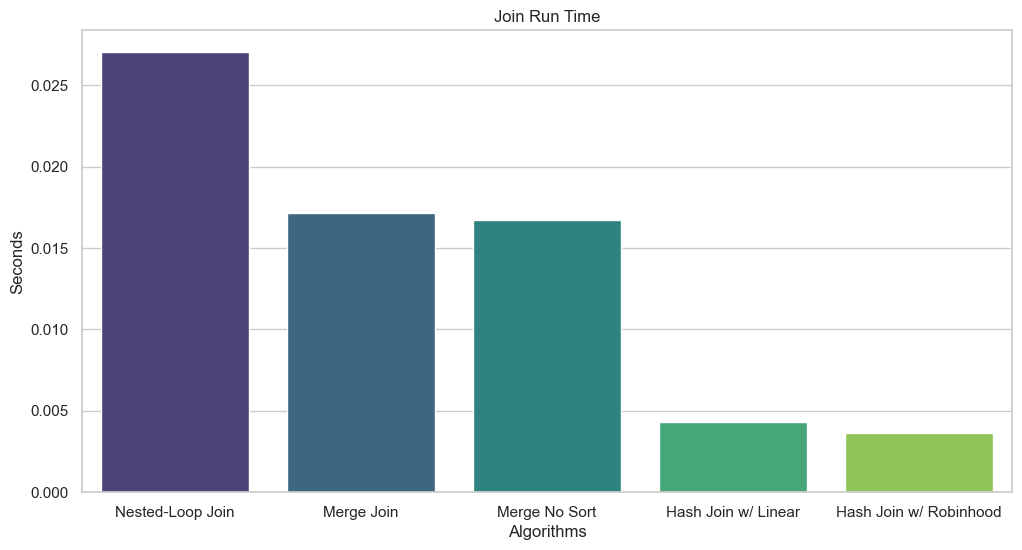

In [11]:

categories = ['Nested-Loop Join', 'Merge Join', 'Merge No Sort', 'Hash Join w/ Linear', 'Hash Join w/ Robinhood']
values = [nestedAverage, sortAverage+mergeAverage, mergeAverage, linearAverage, robinhoodAverage]

# Create bar graph using Seaborn
sns.set(style="whitegrid")  # Set style for the plot
plt.figure(figsize=(12, 6))  # Set figure size (width, height)
sns.barplot(x=categories, y=values, palette="viridis")  # Create a bar graph using Seaborn

# Title and labels
plt.title('Join Run Time')
plt.xlabel('Algorithms')
plt.ylabel('Seconds')

# Show the graph
plt.show()